importing libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def imshow(title = "Image", image = None, size = 10):
    w, h = 976,827
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

reading the images

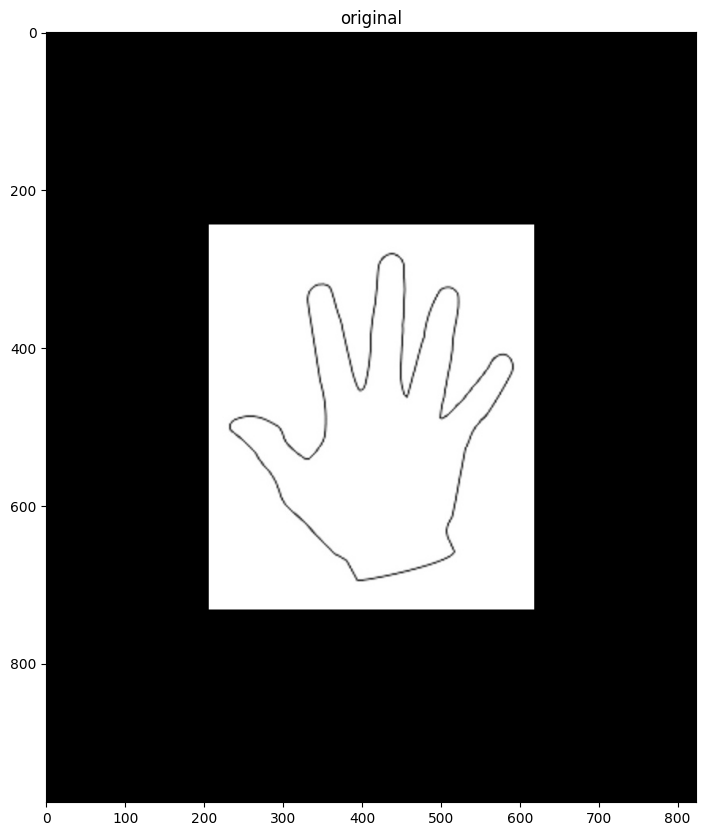

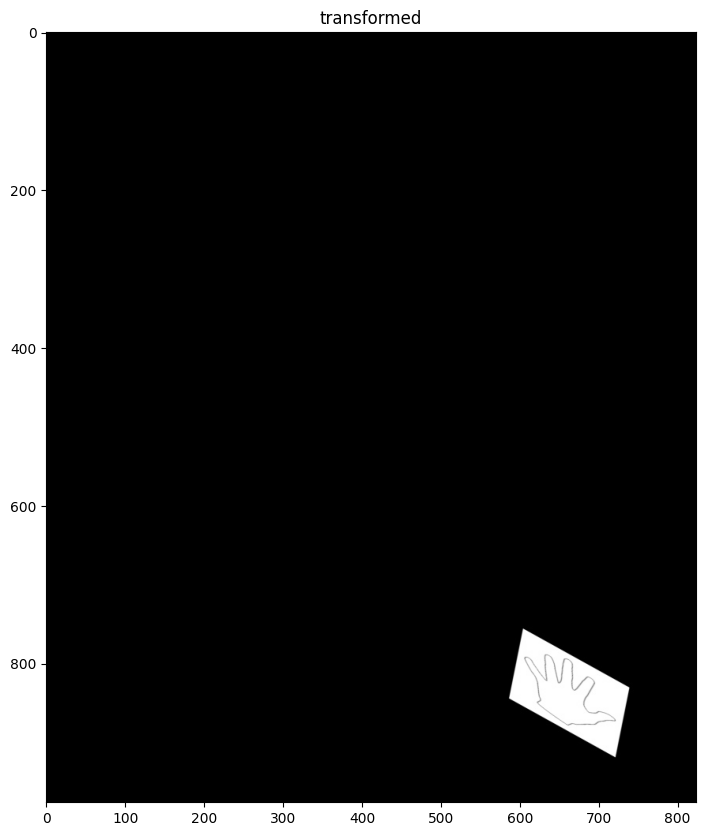

976 824


In [2]:
image1 = cv2.imread('C:/Users/My/Desktop/HW_MULTI/Original_image.jpg')
image2 = cv2.imread('C:/Users/My/Desktop/HW_MULTI/transformed_image.jpg')
imshow("original",image1)
imshow("transformed",image2)
height, width = image1.shape[:2]
print(height,width)

find countour function

In [3]:
def find_contours(image):
   
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = max(contours, key=cv2.contourArea)
    
    cv2.drawContours(image, [largest_contour], -1, (0, 255, 0), 3)
    
    M = cv2.moments(largest_contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    x, y, w, h = cv2.boundingRect(largest_contour)
     
    return (cX, cY), largest_contour, (x, y, w, h)

transforming the original photo to the transformed photo

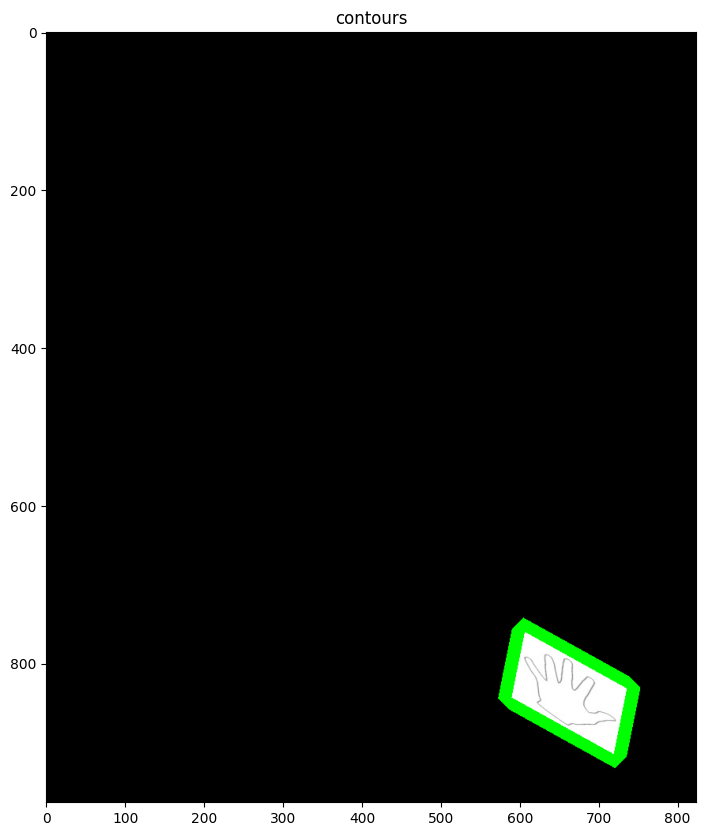

transforned center: (661, 837)
176 187


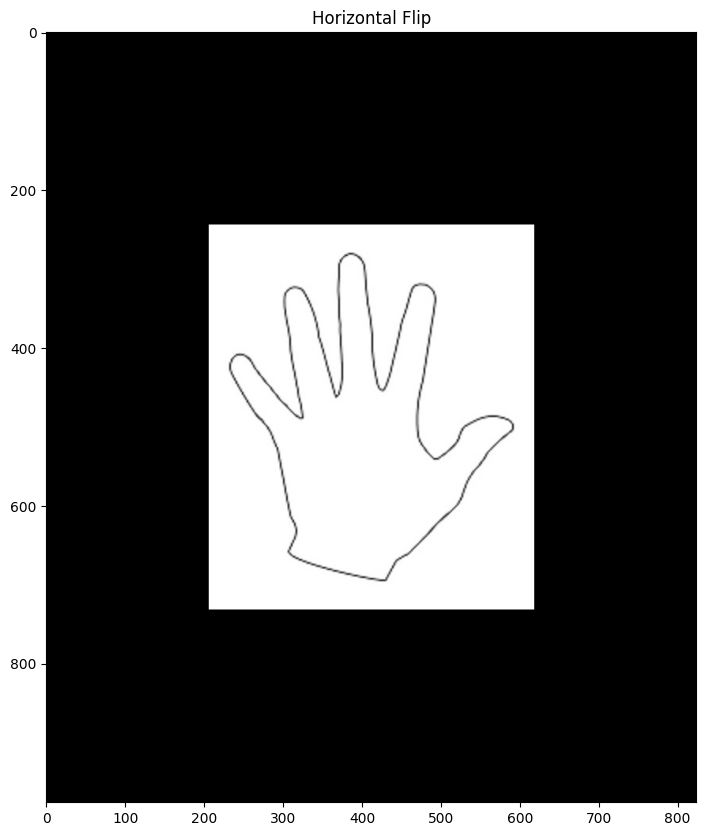

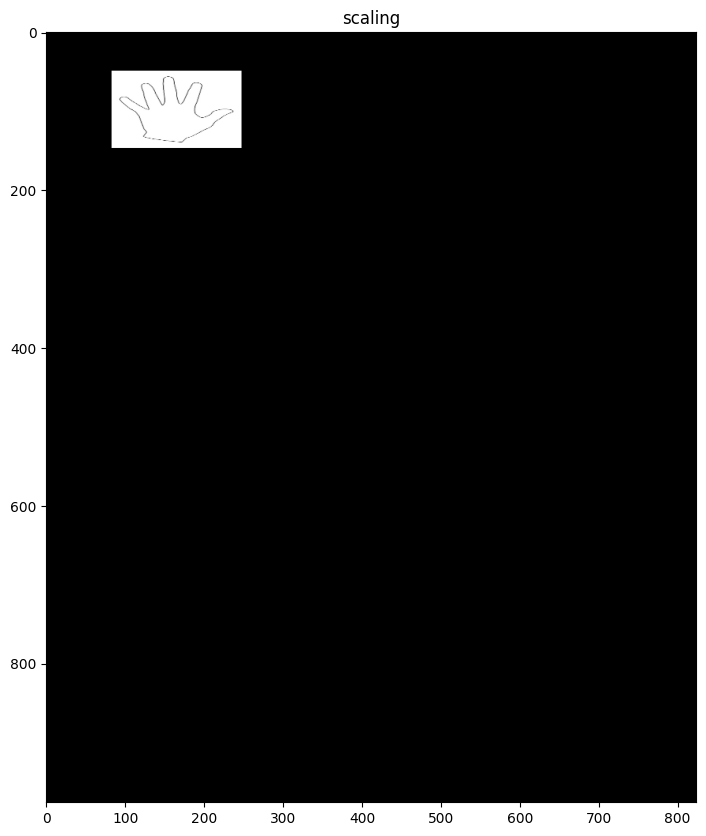

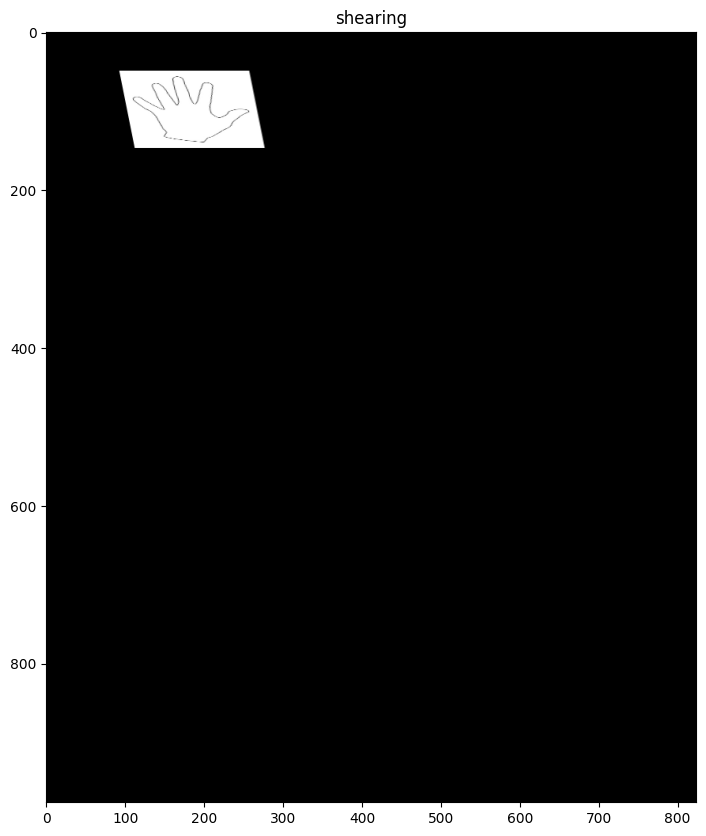

after shear center: (184, 97)


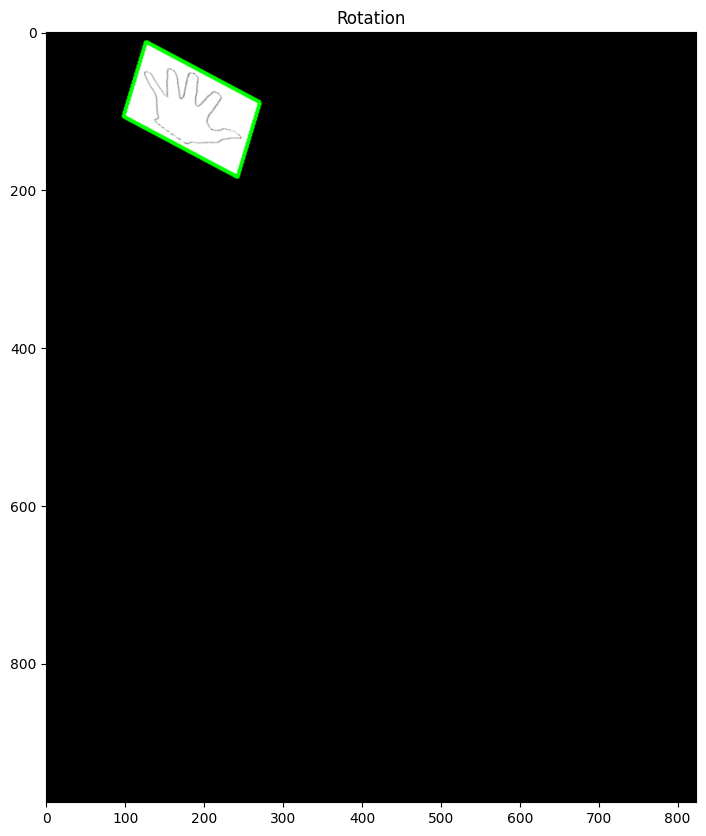

before transformation center: (184, 97)


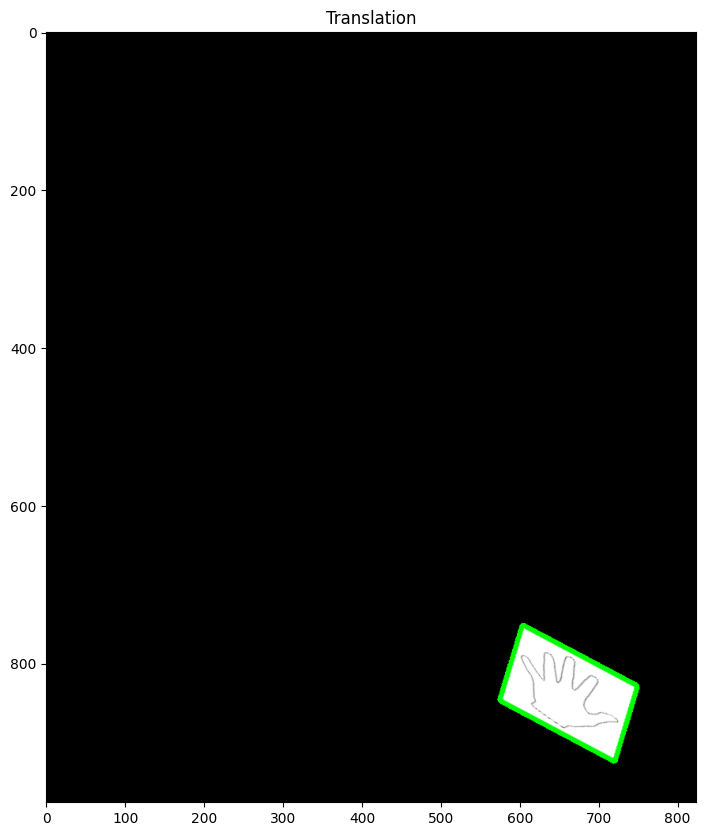

transforned center: (661, 837)
before translation center: (184, 97)
estimated final center: (661, 837)


In [18]:
#transformed image
center2, contour2,(x2,y2,w2,h2) = find_contours(image2)
cv2.drawContours(image2, contour2, -1, (0,255,0), thickness = 1)
imshow("contours", image2)
print("transforned center:",center2)
print(w2,h2)

#flip
flipped = cv2.flip(image1, 1)
imshow("Horizontal Flip", flipped)
#scale
T1 = np.float32([[0.4, 0, 0 ], [0, 0.2,0]])
scaling = cv2.warpAffine(flipped, T1, (824,976))
imshow("scaling", scaling)
#shear
T0 = np.float32([[1, .2, 0 ], [ 0, 1,0]])
shear = cv2.warpAffine(scaling, T0, ( 824,976))
imshow("shearing", shear)
center, contour,(x,y,w,h) = find_contours(shear)
cv2.drawContours(shear, contour, -1, (0,255,0), thickness = 1)
print("after shear center:",center)
#rotate
rotation_matrix = cv2.getRotationMatrix2D(center, -28, 1)
rotated_image = cv2.warpAffine(shear, rotation_matrix, ( 824,976))
imshow("Rotation", rotated_image)
center3, contour3,(x3,y3,w3,h3) = find_contours(rotated_image)
cv2.drawContours(rotated_image, contour3, -1, (0,255,0), thickness = 1)
print("before transformation center:",center3)
#translate
T2 = np.float32([[1, 0, 477], [0, 1,740]])
img_translation = cv2.warpAffine(rotated_image, T2, ( 824,976))
imshow("Translation", img_translation)
center4, contour4,(x4,y4,w4,h4) = find_contours(img_translation )
cv2.drawContours(image1, contour4, -1, (0,255,0), thickness = 1)


print("transforned center:",center2)
print("before translation center:",center3)
print("estimated final center:",center4)

comparing the two pictures :)

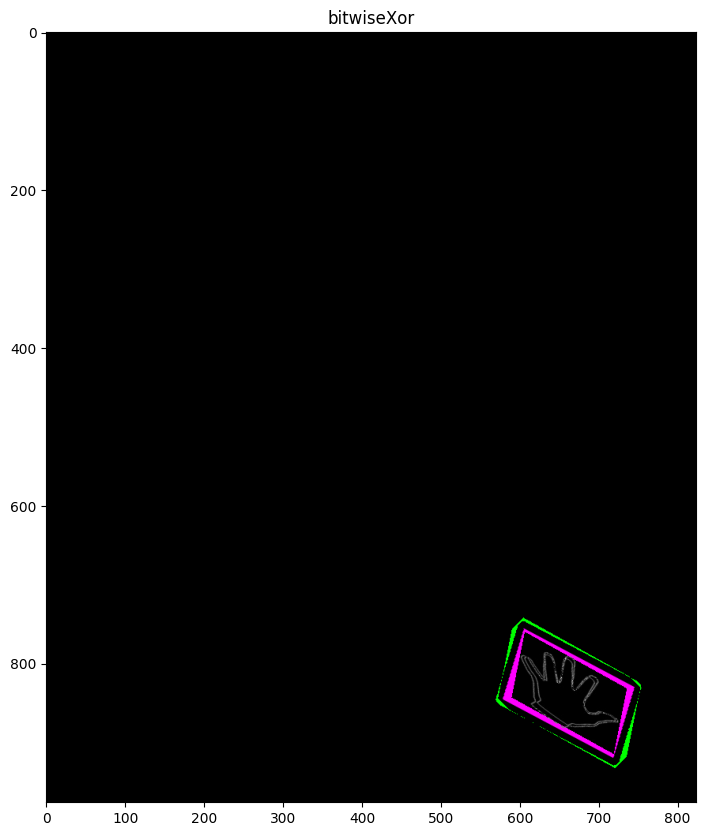

In [19]:
image1 = cv2.imread('C:/Users/My/Desktop/HW_MULTI/Original_image.jpg')
bitwiseor = cv2.bitwise_xor(img_translation, image2)
imshow("bitwiseXor", bitwiseor)

transforming the transferred photo to the original photo

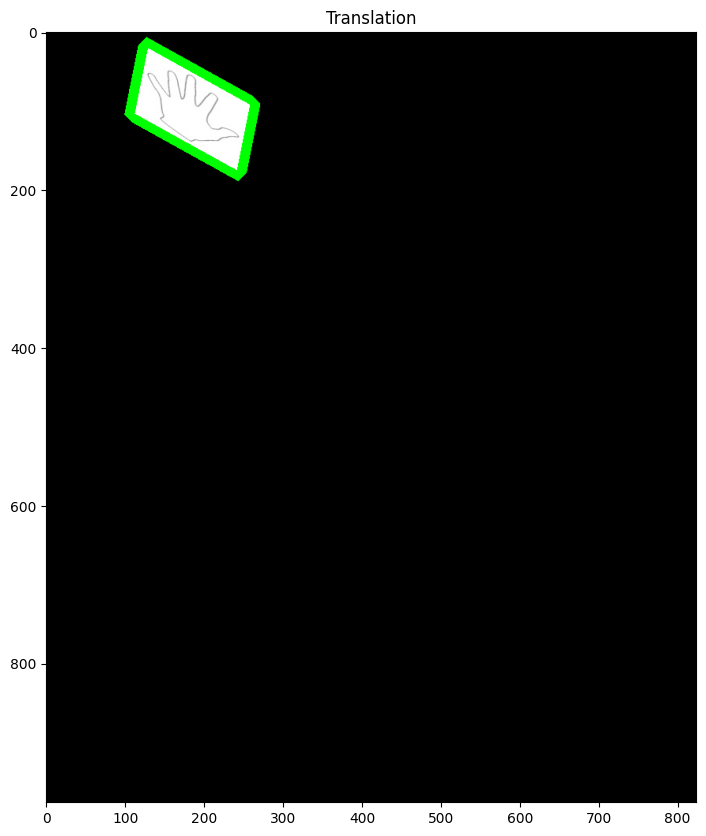

before transformation center: (184, 97)


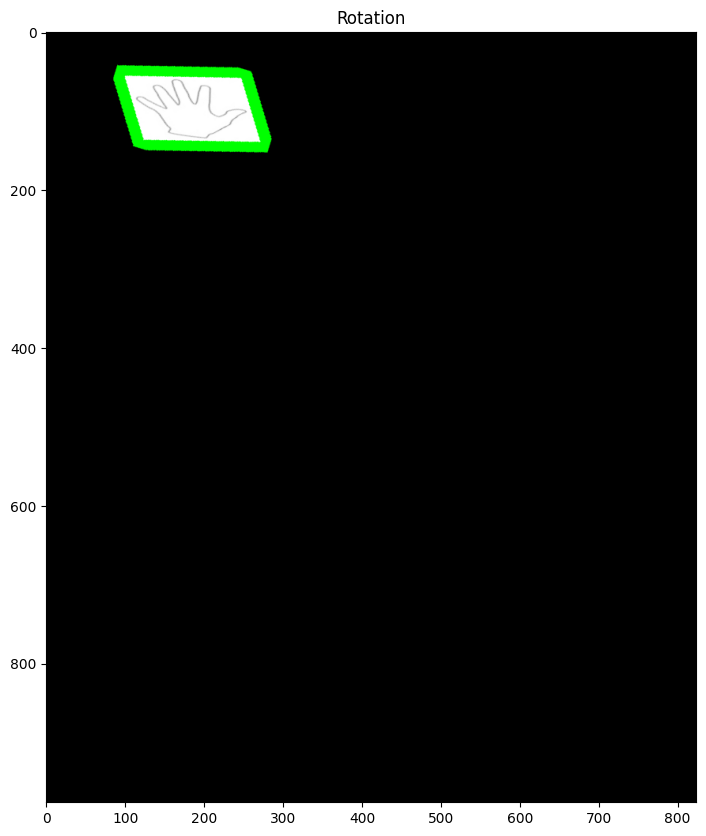

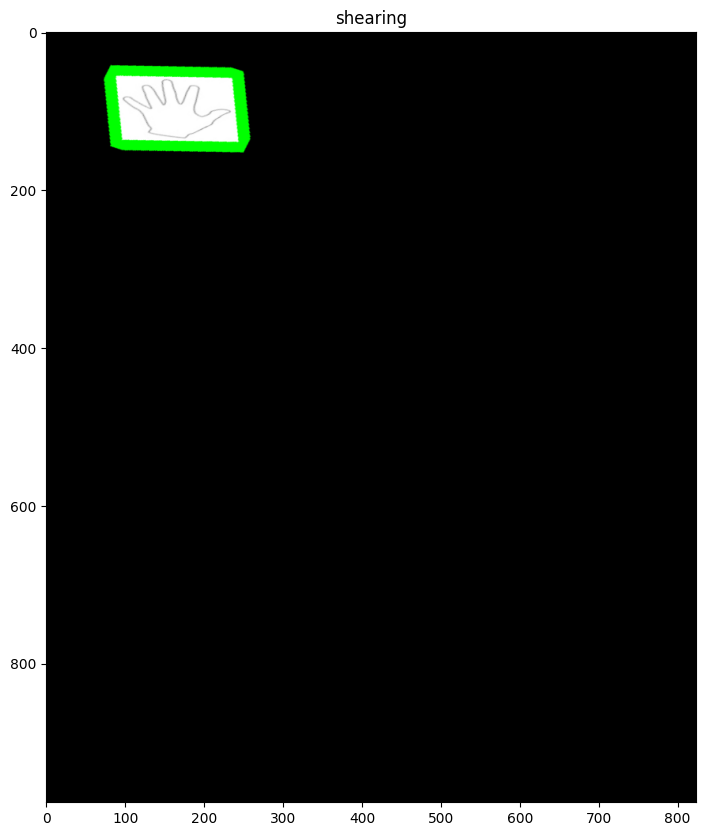

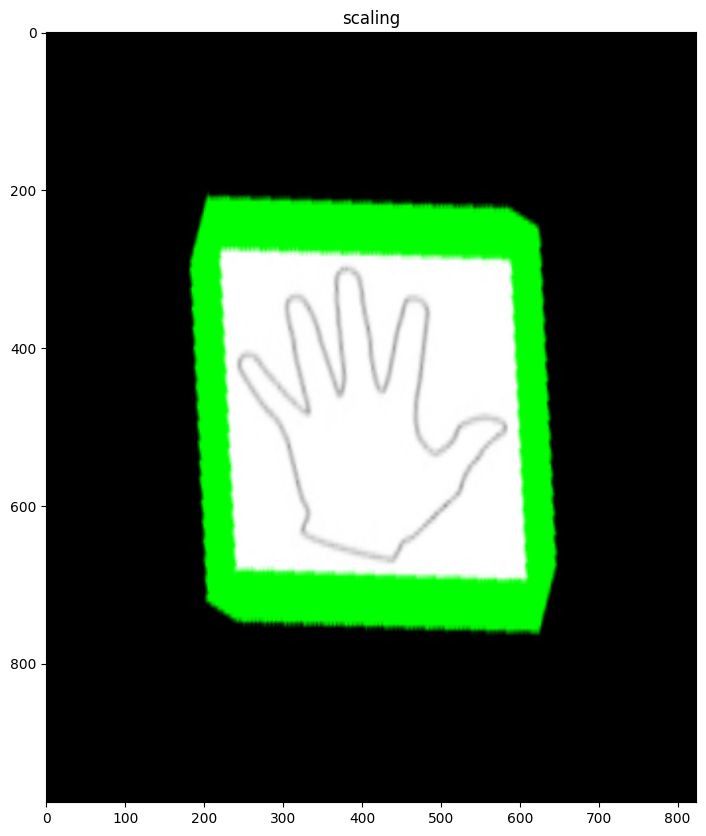

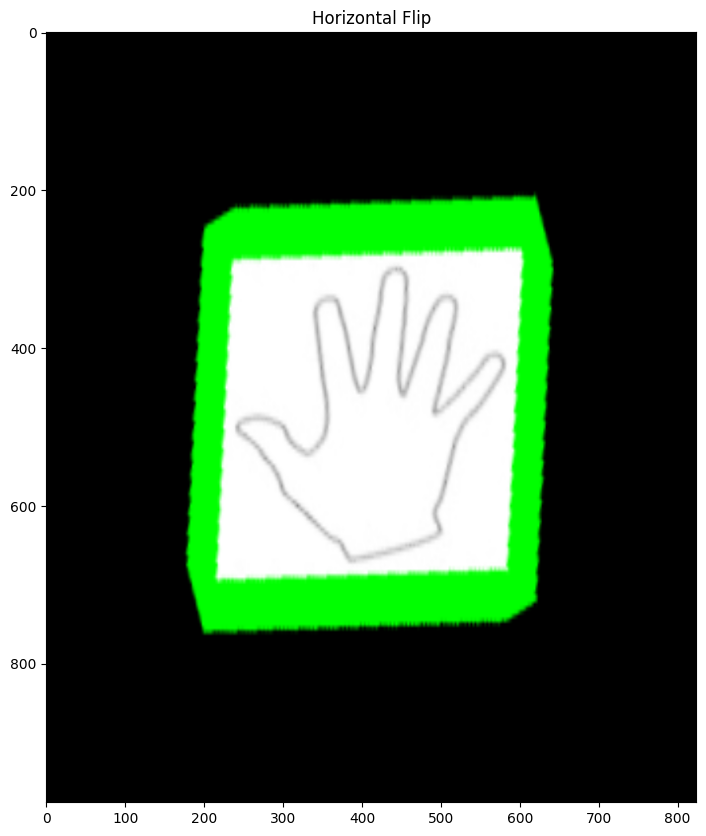

In [15]:
#translate
T2 = np.float32([[1, 0, -477], [0, 1,-740]])
img_translation = cv2.warpAffine(image2, T2, ( 824,976))
imshow("Translation", img_translation)
center5, contour5,(x5,y5,w5,h5) = find_contours(img_translation)
cv2.drawContours(rotated_image, contour5, -1, (0,255,0), thickness = 1)
print("before transformation center:",center5)

#rotate
rotation_matrix = cv2.getRotationMatrix2D(center5, +28, 1)
rotated_image = cv2.warpAffine(img_translation, rotation_matrix, ( 824,976))
imshow("Rotation", rotated_image)

#shear
T0 = np.float32([[1, -.2, 0 ], [ 0, 1,0]])
shear = cv2.warpAffine(rotated_image, T0, ( 824,976))
imshow("shearing", shear)

#scale
T1 = np.float32([[2.5, 0, 0 ], [0, 5,0]])
scaling = cv2.warpAffine(shear, T1, (824,976))
imshow("scaling", scaling)

#flip
flipped = cv2.flip(scaling, 1)
imshow("Horizontal Flip", flipped)